In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import molsysmt as msm
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Wrap to PBC

In [3]:
molsys = msm.convert(msm.demo['two LJ particles']['traj.trjpk'],
                     to_form='molsysmt.TrajectoryDict')

/home/diego/MyMachine/locals/miniconda3/envs/MolSysMT@dprada_3.9/lib/python3.9/site-packages/numpy/ma/core.py:2826: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  _data = np.array(data, dtype=dtype, copy=copy,


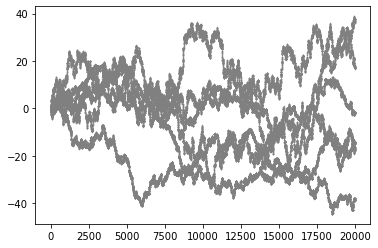

In [4]:
for particle, coordinate in itertools.product(range(2), range(3)):
    plt.scatter(molsys['time'], molsys['coordinates'][:, particle, coordinate], s=1, color='grey', marker='.')
plt.show()

In [5]:
distance = msm.structure.get_distances(molsys, selection=0, selection_2=1, pbc=True)

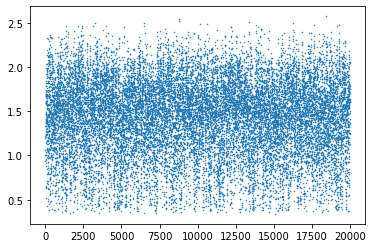

In [6]:
plt.scatter(molsys['time'], distance[:,0,0], s=1, marker='.')
plt.show()

In [7]:
molsys_wrapped = msm.pbc.wrap_to_pbc(molsys)

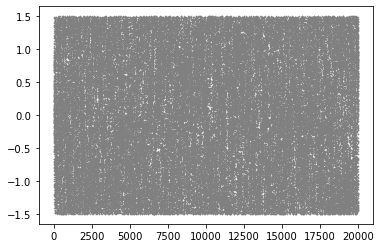

In [8]:
for particle, coordinate in itertools.product(range(2), range(3)):
    plt.scatter(molsys_wrapped['time'], molsys_wrapped['coordinates'][:, particle, coordinate], s=1, color='grey', marker='.')
plt.show()

In [9]:
distance_wrapped = msm.structure.get_distances(molsys_wrapped, selection=0, selection_2=1, pbc=True)

In [10]:
np.allclose(distance[:,:,:], distance_wrapped[:,:,:])

True

In [13]:
molecular_system = msm.convert('pdb_id:1vii', to_form='molsysmt.MolSys')
molecular_system = msm.remove(molecular_system, selection='atom_type=="H"')
molecular_system = msm.build.add_missing_terminal_cappings(molecular_system, N_terminal='ACE', C_terminal='NME')
molecular_system = msm.build.add_missing_hydrogens(molecular_system, pH=7.4)
molecular_system = msm.build.solvate(molecular_system, box_shape='truncated octahedral',
                         clearance='14.0 angstroms', engine='PDBFixer')
molecular_system = msm.pbc.wrap_to_pbc(molecular_system, center_of_selection='molecule_type=="peptide"')

/home/diego/projects@dprada/MolSysMT/molsysmt/item/mmtf_MMTFDecoder/to_molsysmt_Topology.py:31: UserWarning: The structure in the PDB has biological assemblies. There are geometrical transformations proposed in the structure. See the following issue in the source code repository: https://github.com/uibcdf/MolSysMT/issues/33
  warnings.warn(warning_message)


In [14]:
#msm.view(molecular_system, standardize=True, water_as_surface=True)

In [15]:
lengths = msm.get(molecular_system, element='system', box_lengths=True)

In [16]:
distances = msm.structure.get_distances(molecular_system, molecular_system_2=[[0.0, 0.0, 0.0]]*msm.puw.unit('nm'), pbc=False)

In [17]:
np.max(distances)

3.8626177234560384 <Unit('nanometer')>

In [18]:
np.sqrt(3.0*(lengths[0,0]/2.0)**2)

3.625615352943552 <Unit('nanometer')>